In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

import numpy as np

from utils.utils import generate_random_graph, show_graph
from main import GraphGenerator, Solver


In [2]:
# n = 15
# G = generate_random_graph(n)
# show_graph(G)

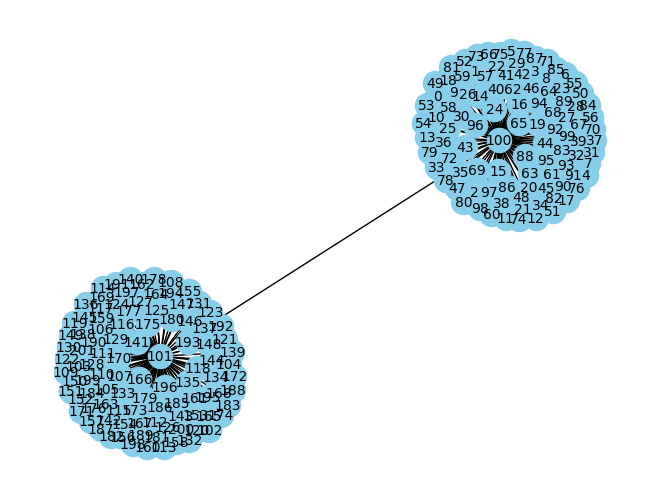

In [7]:
generator = GraphGenerator()

size = 202
pi = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
priors = np.array([100,1,1,100])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

In [9]:
solver = Solver()
priors, pi = solver.EM_algorithm(graph, 4, n_iter=10)
print(priors)
print(pi)

  2%|▏         | 2/100 [00:00<00:09, 10.66it/s]


1.160965322234933e-05


  1%|          | 1/100 [00:00<00:16,  6.01it/s]


3.0800073734404885e-10


  0%|          | 0/100 [00:00<?, ?it/s]


8.012221600687946e-64


  0%|          | 0/100 [00:00<?, ?it/s]


1.7935218361053175e-66


  0%|          | 0/100 [00:00<?, ?it/s]


2.7350854500913555e-70


  0%|          | 0/100 [00:00<?, ?it/s]


7.248022031464629e-78


  0%|          | 0/100 [00:00<?, ?it/s]


0.0


  0%|          | 0/100 [00:00<?, ?it/s]


0.0


  0%|          | 0/100 [00:00<?, ?it/s]


0.0


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
[1.0410482e-244 9.9009901e-001 0.0000000e+000 9.9009901e-003]
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 5.23113774e-245]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.97512438e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [5.23113774e-245 4.97512438e-001 0.00000000e+000 4.97512438e-003]]


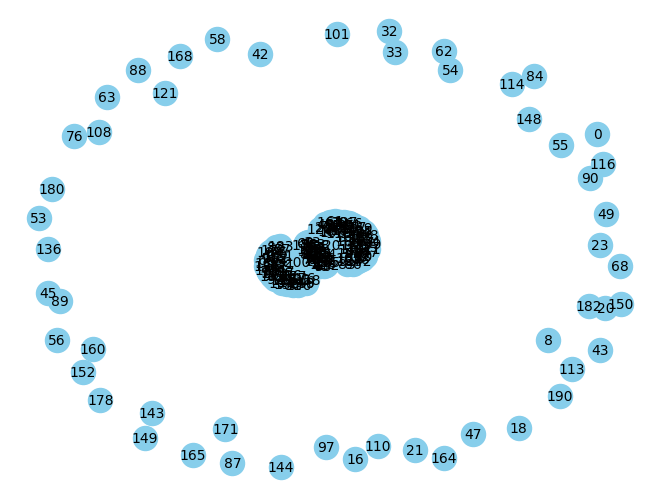

In [10]:
graph = generator.generate(size, pi, priors)
show_graph(graph)

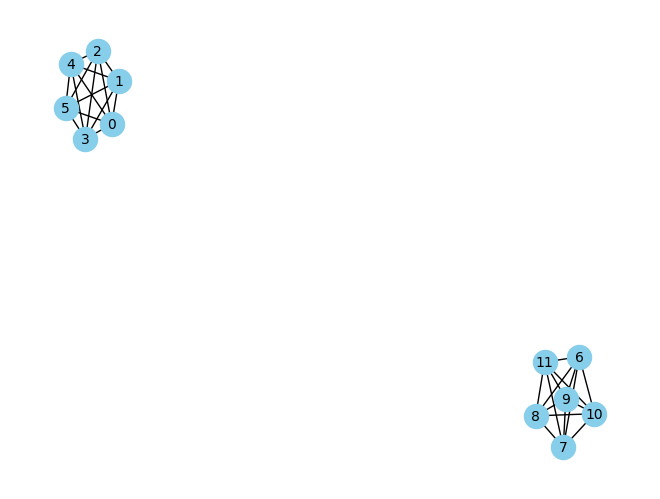

In [12]:
size = 12
pi = np.array([[1,0],[0,1]])
priors = np.array([6,6])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

In [13]:
solver = Solver()
priors, pi = solver.EM_algorithm(graph, 2, n_iter=10)
print(priors)
print(pi)

  3%|▎         | 3/100 [00:00<00:00, 1144.21it/s]


1.770398129961881e-05


  2%|▏         | 2/100 [00:00<00:00, 866.05it/s]


3.378182887189829e-05


  3%|▎         | 3/100 [00:00<00:00, 968.44it/s]


4.9835898356182656e-05


  3%|▎         | 3/100 [00:00<00:00, 1287.65it/s]


4.7915993148190793e-05


  2%|▏         | 2/100 [00:00<00:00, 1057.70it/s]


3.458963771366249e-05


  0%|          | 0/100 [00:00<?, ?it/s]


4.743555962185035e-05


  0%|          | 0/100 [00:00<?, ?it/s]


7.282341127708061e-06


  0%|          | 0/100 [00:00<?, ?it/s]


1.1185171462741936e-06


  0%|          | 0/100 [00:00<?, ?it/s]


1.7180905881406666e-07


  0%|          | 0/100 [00:00<?, ?it/s]

2.639090985979628e-08
[0.01222398 0.98777602]
[[1.49425798e-04 1.20745587e-02]
 [1.20745587e-02 9.75701457e-01]]


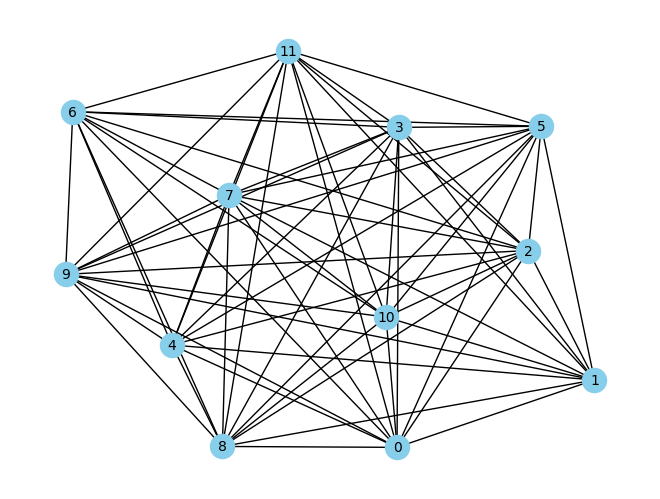

In [14]:
graph = generator.generate(size, pi, priors)
show_graph(graph)

In [8]:
n_nodes = 12
n_clusters = 4
tau =  np.random.uniform(0, 1, size=(n_nodes, n_clusters))


pi = np.random.uniform(0, 1, size=(n_clusters, n_clusters))
graph_edges = np.random.uniform(0, 1, size=(n_nodes, n_nodes))

exp_term = (pi ** graph_edges[:, :, np.newaxis, np.newaxis]) * ((1 - pi) ** (1 - graph_edges[:, :, np.newaxis, np.newaxis]))

# for i in range(n_nodes):
#     for j in range(n_nodes):
#         for k in range(n_clusters):
#             for l in range(n_clusters):
#                 val = (pi[k,l]**graph_edges[i,j]) * (1 - pi[k,l])**(1-graph_edges[i,j])
#                 if not exp_term[i,j,k,l] == val:
#                     print("error")

M = exp_term[:, :, :, :] ** tau[:, np.newaxis, :, np.newaxis]

# product_axis3 = np.prod(M, axis=3)
# tau = tau[:, np.newaxis, :, np.newaxis]
K = exp_term ** tau[np.newaxis, :, np.newaxis, :]


n_nodes = 12
n_clusters = 4
res = np.zeros((n_nodes, n_nodes, n_clusters))
# M = np.random.uniform(0, 1, size=(n_nodes, n_nodes, n_clusters, n_clusters))

for i in range(n_nodes):
    for l in range(n_clusters):
        p = 1
        for j in range(n_nodes):
            if j!=i :
                p_temp = 1
                for k in range(n_clusters):
                    power = exp_term[i,j,k,l] ** tau[j,l]
                    if power != K[i,j,k,l]:
                        print(i,j,"error")
                    p_temp *= exp_term[i,j,k,l] ** tau[j,l]
                    
                # res[i,j,l] = p_temp
                
                # if product_axis3[i,j,l] != p_temp :
                #     print('error')
                p *= p_temp
        # if tau_updated[i,l] != p:
        #     print('error')


In [16]:
import numpy as np

n_nodes = 12
n_clusters = 4

M = np.random.uniform(0,1, size=(n_nodes, n_nodes, n_clusters, n_clusters))
tau = np.random.uniform(0,1, size=(n_nodes, n_clusters))
K = M ** tau[np.newaxis, :, np.newaxis, :]

for i in range(n_nodes):
    for l in range(n_clusters):
        for j in range(n_nodes):
            for k in range(n_clusters):
                power = M[i,j,k,l] ** tau[j,l]
                if power != K[i,j,k,l]:
                    print(power, '  ' ,K[i,j,k,l])
                    print("error")

In [ ]:
for i in range(n_nodes):
    for l in range(n_clusters):
        p = 1
        for j in range(n_nodes):
            if j!=i :
                p_temp = 1
                for k in range(n_clusters):
                    p_temp *= M[i,j,k,l] ** tau[j,l]
                res[i,j,l] = p_temp

In [19]:
n_nodes = 12
n_clusters = 4

tau = np.random.uniform(0,1, size = (n_nodes, n_clusters))
graph_edges = np.random.uniform(0,1, size = (n_nodes, n_nodes))
priors = np.random.uniform(0,1, size = n_clusters)
pi = np.random.uniform(0,1, size = (n_clusters, n_clusters) )

In [20]:
solver = Solver()

In [22]:
tau1 = solver.fixed_point_function(tau, graph_edges, priors, pi)
tau2 = solver.fixed_point_function2(tau, graph_edges, priors, pi)
print(tau1==tau2)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
